<img src="images/cs5228-header-title.png" />

# Assignment 2 - Clustering & Association Rule Mining

Hello everyone, this assignment notebook covers Clustering (again) and Association Rule Mining (ARM). There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A2_YourName_YourNUSNETID.ipynb** (e.g., **A2_BobSmith_e12345678.ipynb**) before submission!
* Remember to rename and save the Python script file **A2_YourName_YourNUSNETID.py** (e.g., **A2_BobSmith_e12345678.py**) before submission!
* Submission deadline is **Oct 3, 11.59 pm**. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if it's rather long; it's just important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [1]:
student_id = 'A0286188L'
nusnet_id = 'E1237250'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well-indicated, but you can use the overview below to double-check that you covered everything.

* **1 DBSCAN & Comparing Cluster Algorithms (30 Points)**
    * 1.1 Implementing DBSCAN for Noise Detection (10 Points)
        * 1.1 a) Compute Core Points (5 Points)
        * 1.2 b) Compute Noise Points (5 Points)
    * 1.2 Questions about Clustering Algorithms (20 Points)
        * 1.2 a) Interpreting Dendrograms for Hierarchical Clusterings (6 Points)
        * 1.2 b) Comparing the Results of Different Clustering Algorithms (6 Points)
        * 1.2 c) Short Essay Questions (8 Points)
* **2 Association Rule Mining (ARM) (20 Points)**
    * 2.1 Implementing Apriori Algorithm (10 Points)
        * 2.1 a) Create Candidate Itemsets $L_k$ (6 Points)
        * 2.1 b) Generate Frequent Itemsets with Apriori Algorithm (4 Points)
    * 2.2 Recommending Movies using ARM (10 Points)
        * 2.2 a) Compare the Runs A-D and Discuss your Observations! (3 Points) 
        * 2.2 b) Compare the Runs A-D and Discuss the Results for Building a Recommendation Engine! (3 Points)
        * 2.2 c) Sketch a Movie Recommendation Algorithm Based on ARM (4 Points)

## Setting up the Notebook

In [2]:
# Some magic so that the notebook will reload the external python script file any time you edit and save the .py file;
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import DBSCAN

from efficient_apriori import apriori   # https://pypi.org/project/efficient-apriori/

from src.utils import *

np.set_printoptions(precision=2)

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A2_YourName_YourNUSNETID.py`, you also need to edit the import statement below accordingly.

In [4]:
from A2_VishwanathDattatreyaDoddamani_e1237250 import get_noise_dbscan
#from A2_BobSmith_e12345678 import get_noise_dbscan # <-- you well need to rename this accordingly

-------------------

## 1 DBSCAN & Comparing Cluster Algorithms (30 Points)


### 1.1 Implementing DBSCAN for Noise Detection (10 Points)

In the lecture, we covered the original algorithm of DBSCAN, which you can also find on [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN). While not difficult to implement, it takes quite a couple of lines of codes to do so. For this assignment, however, we are only interested in the points of a dataset that DBSCAN considers noise (as illustrated below; the red dots in the next plot). This includes that we do not have to care about

* how many clusters there are (the plot below hints at 3 clusters but it does not matter) *and*
* which non-noise points (the grey dots in the plot below) belong to which cluster

**Your task is to implement a modified/simplified version of DBSCAN to find all noise points in a dataset!** The skeleton of method `get_noise_dbscan()` you need to complete is found in the file `A2.py` (before the appropriate renaming). The method takes data matrix `X` as well as the two basic parameters `eps` and `min_samples` as input parameters; we use the same naming as scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  The output should be 2 lists of indices: (a) one containing the indices of all *core points* and (b) one containing the indices of all *noise points* in input dataset X.

**Important:**
* We only split this task into 1.1 a) and 1.1 b) to have intermediate results you can check for correctness (and potentially to better allow for partial marking). Our reference solutions first finds all core points and uses this information to find all noise points; hence the 2 separate code blocks for you to complete.
* However, if you have a better/faster/shorter/cooler/etc. solution, you are more than welcome to implement it and ignore the intermediate result of finding all core points. Only the result from 1.1 b) is important. This also means that you can ignore 1.1 a) and still get full marks if you correctly identify all noise points.
* If you have an alternative solution, please make sure that the method still returns the 2 output parameters `(core_point_indices, noise_point_indices)`. If you do not need to explicitly identify the core points, you can simply return `None` for `core_point_indices`.
* You can import any method `numpy`, `scipy`, `sklearn`, or `pandas` has to offer -- except for any ready-made implementation of DBSCAN, of course :). Please add any imports to the code cell at the top with the other imports. Hint: We already imported [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) for you.

We will benchmark your implementation as part of our Little Competitions to see whose solution is the fastest.

#### Dataset Preparation (nothing for you to do here)

In [5]:
X_dbscan_toy = pd.read_csv('data/a2-dbscan-toy-dataset.txt', header=None, sep=' ').to_numpy()

print('The shape of X_dbscan_toy is {}'.format(X_dbscan_toy.shape))

The shape of X_dbscan_toy is (70, 2)


Now we can run scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on this dataset. Here we use `eps=0.1` and `min_samples=10` as values for the two main input parameters for DBSCAN that specify the minimum "density" of clusters.

In [6]:
dbscan_clustering = DBSCAN(eps=0.1, min_samples=10).fit(X_dbscan_toy)

The points that are noise points are labeled with `-1`, while all points belonging to clusters are labeled with `0`, `1`, `2`, etc. So we can easily find the indices of all the points labeled as noise as follows:

In [7]:
cluster_point_indices = np.argwhere(dbscan_clustering.labels_ >= 0).squeeze()
noise_point_indices = np.argwhere(dbscan_clustering.labels_ < 0).squeeze()

print('The indices of the points labeled as noise are: {}'.format(noise_point_indices))

The indices of the points labeled as noise are: [ 0  4 27 31 33 39 43 46 51 65]


Of course, we can also plot the results. Note that the figure below only highlights the points labeled as noise as red triangles; all points belonging to *some* clusters are in grey points (note that we do not care to which exact cluster these points belong).

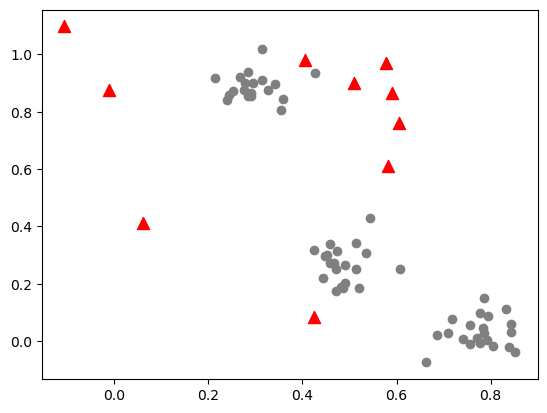

In [8]:
plt.figure()
plt.scatter(X_dbscan_toy[cluster_point_indices,0], X_dbscan_toy[cluster_point_indices,1], c='grey')
plt.scatter(X_dbscan_toy[noise_point_indices,0], X_dbscan_toy[noise_point_indices,1], c='red', marker='^', s=75)
plt.show()

Summing up, the red dots in the plots we define as noise or outliers as they are very dissimilar to the other data points. In practice, we would likely remove those noise points, treat them separately, or maybe perform additional preprocessing steps to potentially "denoise" the dataset. However, the steps of choice generally depend heavily on the exact data mining task. Here, we focus on the identification of noise points.

#### 1.1 a) Compute Core Points (5 Points)

As mentioned above, our reference solution first computes all core points. If you follow this approach, complete the respective part in the code of method `get_noise_dbscan()`. Some hints:
* Recall that we do not care to which cluster a core point belongs to, only that it is a core point in *some* cluster
* Have a look at method [`sklearn.metrics.pairwise.euclidean_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html); it might make your life easier.

In [9]:
my_core_point_indices, _ = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of core points: {}\n'.format(len(my_core_point_indices)))
print('The first 25 indices of the points labeled as core points:\n{}'.format(sorted(my_core_point_indices)[:20]))

Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]


The output of previous code cell should look like:
    
```
Total number of core points: 50

The first 25 indices of the points labeled as core points:
[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]
```

Note that `0`, `4`, and `27` are missing from this list since [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) told us that these points are noise. Of course, also the border points are missing here, but [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) does not return those explicitly.

#### 1.1 b) Compute Noise Points (5 Points)

Knowing the core points is useful but only an intermediate step. Now it is time to complete the method `get_noise_dbscan()` to compute the indices of all noise points in `X`. Again, our reference solution uses `core_point_indices` to accomplish this. If your implementation does not require the information about core points but returns the correct `noise_point_indices` then this is perfectly fine!

In [10]:
_, my_noise_point_indices = get_noise_dbscan(X_dbscan_toy, eps=0.1, min_samples=10)

print('Total number of noise points: {}\n'.format(len(my_noise_point_indices)))
print('The indices of all points labeled as noise points:\n{}'.format(sorted(my_noise_point_indices)))

Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]


The output of previous code cell should look like:

```
Total number of noise points: 10

The indices of all points labeled as noise points:
[0, 4, 27, 31, 33, 39, 43, 46, 51, 65]
```

Since we used the same values for `eps` and `min_samples`, this result matches the output we saw earlier when we used scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) over the toy dataset.

### 1.2 Questions about Clustering Algorithms (20 Points)

#### 1.2 a) Interpreting Dendrograms for Hierarchical Clusterings (6 Points)

We saw in the lecture that dendrograms are a meaningful way to visualize the hierarchical relationships between the data points with respect to the clustering using AGNES (or any other hierarchical clustering technique). Properly interpreting them is important to get a correct understanding of the underlying data.

Below are the plots of 6 different datasets labeled A-F. Each dataset contains 30 data points, each with two dimensions.

<img src="images/a2-agnes-data-labeled.png">

Below are 6 dendrograms labeled 1-6. These dendograms show the clustering using AGNES with Single Linkage for the 6 datasets above, but in a random order.

<img src="images/a2-agnes-dendrogram-labeled.png">

Find the correct combinations of datasets and dendrograms -- that is, find for each dataset the dendrogram that visualizes the clustering using AGNES with Single Linkage! Give brief explanation for each decision! Complete the table below! (The last line shows an example.)

**Your Answer:**

| Dataset | Dendrogram | Brief Explanation |
| ---  | ---   | ---                  |
| **A**    | 6 | There are two clusters that can be seen of equal size which is reflected in 6th dendrogram. |
| **B**    | 5 | The center point of the circle will be merged last, while all the other data points merge before, this can be seen in 5th dendrogram. |
| **C**    | 2 | Two points are far from rest of the data points and hence should be merged last. This sequence is noticeable in 2nd dendrogram. |
| **D**    | 4 | There are three well separated clusters of somewhat equal size that can be seen immediately which is noticed in 4th dendrogram. |
| **E**    | 1 | The random data points merging pattern can be seen in 1st dendrogram. |
| **F**    | 3 | The distance between data points is increasing, which means that each data point will join the cluster at each level. This exact pattern can be seen in 3rd dendrogram. |
| **<font color='red'>X</font>**    | **<font color='red'>9</font>** | <font color='red'>The dataset plot looks like a face and the dendrogram looks like a hat (please come up with better explanations :) !)</font> |

#### 1.2 b) Comparing the Results of Different Clustering Algorithms (6 Points)

The figure belows shows the 6 different clusterings A-F, each computed over a dataset of 8 unique data points $x_1 x_2, ..., x_8$. The datasets are independent from each other for the 6 clusterings. Each clustering contains 3 clusters are represented by the table. A `1` in the result table indicates that the corresponding data point is part of the corresponding cluster. For example, in Clustering A, the `1` in the bottom-left cell indicates that data point $x_8$ is part of Cluster $C_1$.

**Addtional constraints:**

* For K-Means and DBSCAN, the 3 cluster $C_1$, $C_2$, and $C_3$ are the **only** clusters; for AGNES you can assume there might be **more** clusters in the hierarchy
* For DBSCAN, the input parameter for the minimum number of neighboring points is  $MinPts \geq 2$

<img src="images/a2-clustering-comparison.png">

**For each clustering, decide which algorithm (K-Means, DBSCAN, AGNES) can have produced the clustering!** Use the table below for the answer. If an algorithm could have produced a clustering, just write *OK* in the respective cell of the table. If an algorithm could not have produced a clustering, enter a brief explanation into the respective table cell.

**Your Answer:**

|  | K-Means | DBSCAN       | AGNES |
|-----|------------------------------------------------------------------------------------------------------------|--------------| ------- |
| **Clustering A**  | OK | There cannot be empty clusters in DBSCAN | There cannot be empty cluster in AGNES |
| **Clustering B**  | K-Means is exclusive and in clustering B there are some data points that belong to more than one cluster | DBSCAN is exclusive and in clustering B there are some data points that belong to more than one cluster | OK |
| **Clustering C**  | There is no exclusivity and completeness | There is no exclusivity | There is no completeness |
| **Clustering D**  | There is no completeness | OK | There is no completeness |
| **Clustering E**  | OK | Min 2 points are required to form a cluster, C2 only has one data point | OK |
| **Clustering F**  | There is no exclusivity | There is no exclusivity | OK |

#### 1.2 c) Short Essay Questions (8 Points)

Recall the K-Means results in clusterings that are complete, i.e., each data point is assigned to a cluster. In contrast, DBSCAN has the notion of noise, i.e., points that are not part of any cluster, which can be used to identify outliers (see also Task 1.1). Now let's assume we want to identify outliers in a dataset but only have a standard implementation for K-Means available.

**How can we utilize K-Means to (potentially) identify outliers? (2 Points)** Since the notion of outliers is not well defined, its not about having a fool-proof solution but to make a well-informed decision to limit the set of data points that are potential outliers.

**Your Answer:**

1) Run K-Means and assign all data points to clusters and get standard deviation of each cluster along with centroid (mean).
2) Calculate z-score of all data points in all clusters.
3) If z-score is greater than 3 or less than -3, then mark those data points as outliers.

We saw in the lecture that K-Means can return empty clusters.

**In which situation may K-Means return at least 1 empty cluster? (2 Points)** To address this task, please make the following assumptions:
* The number of data points $N$ in the dataset is $N > 0$
* The number of clusters $K$ when running K-Means is $K \geq 2$
* The initialization of the initial centroids can be arbitrarily good or bad

**Your Answer:**

1) If K > N, then K-Means returns empty clusters.
2) If the initialization of centroids is bad then a centroid is far from data points making its cluster empty (centroid is 'blocked off' data points by other centroids). 

Assume your dataset contains the geolocations of traffic accidents on Singapore expressways over the time span of a year. Using AGNES, you want to find sections of the expressways where traffic accidents are particularly common.

**Which Linkage Methods covered in the lecture is most suitable for this task? (2 Points)** Briefly explain your choice!

**Your Answer:**

1) Complete linkage method is suitable for this task as it clusters data points based on farthest distance, making it a good choice in identifying a the minimum area of an accident section in the expressway and it is also less susceptible to noise (Single linkage might form a large cluster size or large area of a section since it considers nearest distance and thereby diluting the cluster or chaining).
2) Average linkage method is also suitable for this task since it is not prone to globular clusters and hence can spot the section with lesser area compared to single linkage.
3) Ward linkage method is most suitable for this task as it identifies specific and well-separated clusters better than the rest of the linkage methods. As it minimizes variance within clusters, it helps identify dense clusters that are accident hotspots.

Assume you have a dataset `X`, run DBSCAN, and get a clustering that contains a set of clusters and some noise points (there's no need to be more precise; it's only important that you don't get just noise). Let's also assume you create a new dataset `X_new` simply by shuffling `X` (i.e., randomly change the order of data points in the dataset); no other changes. Now you run DBSCAN with the *same* parameters as before over `X_new` and get a different clustering, i.e., most of the clusters are not exactly the same as before.

**What does this information tell about the dataset and clustering? (2 Points)** This may include a brief discussion how changing the parameters of DBSCAN will likely affect the results.

**Your Answer:**

1) Since the clusters are not exactly same as before, it tells us that dataset contains a lot of border points.
2) If eps is increased or min points is decreased then the result might be more deterministic even after shuffling as this increases more core points (core points are deterministic, border and noise points aren't deterministic).

---

## 2 Association Rule Mining (ARM)

Your task is to implement the Apriori Algorithm for finding Association Rules. In more detail, we focus on the **Apriori Algorithm for finding Frequent Itemsets** -- once we have the Frequent Itemsets, we use a naive approach for the association rule. We will provide a small method for that part later.


### 2.1 Implementing Apriori Algorithm

#### Toy Dataset

The following dataset with 5 transactions and 6 different items is directly taken from the lecture slides. This should make it easier to test your implementation. The format is a list of tuples, where each tuple represents the set of items of an individual transaction. This format can also be used as input for the `efficient-apriori` package.

In [11]:
transactions_demo = [
    ('bread', 'yogurt'),
    ('bread', 'milk', 'cereal', 'eggs'),
    ('yogurt', 'milk', 'cereal', 'cheese'),
    ('bread', 'yogurt', 'milk', 'cereal'),
    ('bread', 'yogurt', 'milk', 'cheese')
]

#### Auxiliary Methods

We want you to focus on the Apriori algorithm. So we provide a set of auxiliary functions. Feel free to look at their implementation in the file `src/utils.py`.

The method `unique_items()` returns all the unique items across all transactions.

In [12]:
unique_items(transactions_demo)

{'bread', 'cereal', 'cheese', 'eggs', 'milk', 'yogurt'}

The method `support()` calculates and returns the support for a given itemset and set of transactions.

In [13]:
support(transactions_demo, ('bread', 'milk'))

0.6

The method `confidence()` calculates and returns the confidence for a given association rule and set of transactions. An association rule is represented by a 2-tuple, where the first element represents itemset X and the second element represents items Y (i.e., $X \Rightarrow Y$)

In [14]:
confidence(transactions_demo, (('bread',), ('milk',)))

0.75

The method `merge_itemsets()` merges two given itemsets into one itemset.

In [15]:
merge_itemsets(('bread', 'milk'), ('bread', 'eggs'))

('bread', 'eggs', 'milk')

For your implementation, you can make use of these auxiliary methods wherever you see fit. And that is, of course, strongly recommended, as it makes the programming task much easier. So, let's get started.

#### 2.1 a) Create Candidate Itemsets $L_k$ (6 Points)

Let's assume we have found $F_{k-1}$, i.e., all Frequent Itemsets for size $k-1$. For example $F_1$ is the set of all Frequent Itemsets of size 1, which is simply the set of unique items across all transactions with sufficient support. The next step is now to find $L_k$, all Candidate Itemsets of size $k$. In the lecture, we introduced two methods for this. For this assignment, we focus on the $\mathbf{F_{k-1} \times F_{k-1}}$ method -- that is, we use the Frequent Itemsets from the last step to calculate the Candidate Itemsets for the current step.

Recall from the lecture that creating $L_k$ involves two main parts:

* **Generating** all possible $k$-itemsets from the Frequent Itemsets $F_{k-1}$; and

* **Pruning** all $k$-itemsets that cannot be frequent based on the information we already have ($L_k$ should only contain the itemsets for which we indeed calculate the support for)


Recall that we also can (and should) **prune** any Candidate Itemsets than cannot possibly also be Frequent Itemsets  based on the information we already have. In other words, the Candidate Itemsets of size $k$ should only contain the itemsets for which we indeed calculate the support for.

**Hint:** In the lecture, to make it more illustrative, we first generate all possible Candidate Itemsets and then prune the ones that cannot possibly be frequent. In practice, to save memory space, it's better to check each Candidate Itemset immediately before even adding it to $L_k$. The skeleton code below reflects this. However, if you indeed want to implement pruning as its own step, you're free to do so.

**Implement method `generate_Lk()` to calculate the Candidate Itemsets $L_k$ given the Frequent Itemsets $F_{k-1}$!** Note that we walked in detail through an example of this process in the lecture. Below is a code cell that reflects this example to test your implementation.

In [16]:
def generate_Lk(Fk_minus_one):

    # The code just looks a bit odd since we cannot get an element from a set using indexing
    k = len(next(iter(Fk_minus_one))) + 1

    # Initialize as set as a fail safe to avoid any duplicates
    Lk = set()
    
    for itemset1 in Fk_minus_one:
        for itemset2 in Fk_minus_one:
            
            ######################################################################
            ### Your code starts here ############################################
            itemset = merge_itemsets(itemset1, itemset2)
            if len(itemset) == k:
                gen_powerset = powerset(itemset, min_len=k-1, max_len=k-1)
                flag = 0
                for gen_itemset in gen_powerset:
                    if gen_itemset not in Fk_minus_one:
                        flag = 1
                if flag == 0:
                    Lk.add(itemset)
                    
            ### Your code ends here ##############################################
            ######################################################################
            
            pass # Just there so the empty loop does not throw an error
    
    ######################################################################
    ### Your code starts here ############################################
    
    # MAY ONLY BE REQUIRED IF YOU TREAT PRUNING AS A SEPARATE STEP!!!
    # which you shouldn't for performance reasons in practice, but for the assignment its fine
    
    ### Your code ends here ##############################################
    ######################################################################
    
    return Lk

In [17]:
k_itemsets = generate_Lk({
    ('bread', 'cereal'), ('bread', 'milk'), ('bread', 'yogurt'), ('cereal', 'milk'),
    ('cereal', 'yogurt'), ('cheese', 'milk'), ('cheese', 'yogurt'), ('milk', 'yogurt')
})

for itemset in k_itemsets:
    print(itemset)

('bread', 'milk', 'yogurt')
('cheese', 'milk', 'yogurt')
('cereal', 'milk', 'yogurt')
('bread', 'cereal', 'yogurt')
('bread', 'cereal', 'milk')


#### 2.1 b) Generate Frequent Itemsets with Apriori Algorithm (4 Points)

The method `generate_Lk()` covered the "Generate" and "Prune" steps of the Apriori Algorithm for finding Frequent Itemsets. Now only the "Calculate" and "Filter" step is missing. However, with `generate_Lk()` in place and together with the auxiliary methods we provide (see above), putting the Apriori Algorithm together should be pretty straightforward.

**Implement `frequent_itemsets_apriori()` to find all Frequent Itemset given a set of transactions and a minimum support of `min_support`!** Again, below is a code cell that reflects this example to test your implementation.

In [18]:
def frequent_itemsets_apriori(transactions, min_support):
    
    # The frequent 1-itemsets are all unique items across all transactions with sufficient support
    # The one-liner below simply loops over all uniques items and checks the condition w.r.t. the support
    F1 = set([(s,) for s in unique_items(transactions) if support(transactions, (s,)) >= min_support ])
    
    # If there is not even a single 1-itemset that is frequent, we can just stop here
    if len(F1) == 0:
        return {}
    
    # Initialize dictionary with all current frequent itemsets for each size k
    # Example: { 1: {(a), (b), (c)}, 2: {(a, c), ...} }
    F = { 1: F1 }
    
    # Find now all frequent itemsets of size 2, 3, 4, ... (sys.maxsize basically mean infinity here)
    for k in range(2, sys.maxsize):

        Fk = set()
        
        ########################################################################################
        ### Your code starts here ##############################################################
        candidate_k = generate_Lk(F[k-1])
        Fk = set([s for s in candidate_k if support(transactions, s) >= min_support])
        if len(Fk) == 0:
            break
        ### Your code ends here ################################################################
        ########################################################################################
                
        F[k] = Fk    

    # Merge the dictionary of itemsets to a single set and return it
    # Example: {1: {(a), (b), (c)}, 2: (a, c)} => {(a), (b), (c), (a, c)}
    return set.union(*[ itemsets for k, itemsets in F.items() ])

In [19]:
frequent_itemsets = frequent_itemsets_apriori(transactions_demo, 0.6)
for itemset in frequent_itemsets:
    print(itemset)

('milk',)
('cereal', 'milk')
('bread',)
('bread', 'yogurt')
('yogurt',)
('cereal',)
('bread', 'milk')
('milk', 'yogurt')


#### From Frequent Itemsets to Association Rules (nothing for you to do here!)

Your implementation so far gives you the Frequent Itemsets in a list of transactions using the Apriori method. This step is typically the most time-consuming one in Association Rule Mining. However, we still have to do the second step and find all Association Rules given the Frequent Itemsets. We saw in the lecture that this can also be done in an efficient manner using the Apriori method to avoid checking all rules.

Since this step is typically less computationally expensive, we simply do it the naive way -- that is, we go over all Frequent Itemsets, and check for each Frequent Itemset and which of the Association Rules that can be generated from it has a sufficiently high confidence. With all the auxiliary methods we provide, this becomes trivial to implement, so we simply give you the method `find_association_rules()` below. Note how it uses your implementation of `frequent_itemsets_apriori()`.

In [20]:
def find_association_rules(transactions, min_support, min_confidence):
    # Initialize empty list of association rules
    association_rules = []
    
    # Find and loop over all frequent itemsets
    for itemset in frequent_itemsets_apriori(transactions, min_support):
        if len(itemset) == 1:
            continue

        # Find and loop over all association rules that can be generated from the itemset
        for r in generate_association_rules(itemset):
            # Check if the association rule fulfils the confidence requriement
            if confidence(transactions, r) >= min_confidence:
                association_rules.append(r)
                
    # Return final list of association rules
    return association_rules

In [21]:
for rule in find_association_rules(transactions_demo, 0.4, 1.0):
    print(rule)

(('cereal',), ('milk',))
(('cheese',), ('milk', 'yogurt'))
(('cheese', 'milk'), ('yogurt',))
(('cheese', 'yogurt'), ('milk',))
(('cheese',), ('yogurt',))
(('cereal', 'yogurt'), ('milk',))
(('bread', 'cereal'), ('milk',))
(('cheese',), ('milk',))


#### Comparison with `efficient-apriori` package  (nothing for you to do here!)

You can run the apriori algorithm over the demo data to check if your implementation is correct. Try different values for the parameters `min_support` and `min_confidence` and compare the results. Note that the order of the returned association rules might differ between your implementation and the apriori one.

In [22]:
_, rules = apriori(transactions_demo, min_support=0.4, min_confidence=1.0)

for r in rules:
    print('Rule [{} => {}] (support: {}, confidence: {}, lift: {})'.format(r.lhs, r.rhs, r.support, r.confidence, r.lift))


Rule [('cereal',) => ('milk',)] (support: 0.6, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('yogurt',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('bread', 'cereal') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cereal', 'yogurt') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese', 'yogurt') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese', 'milk') => ('yogurt',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('milk', 'yogurt')] (support: 0.4, confidence: 1.0, lift: 1.6666666666666667)


The `efficient-apriori` provides, of course, a much more efficient and convenient implementation (e.g., keeping track of all the metrics for each rule). And this is why we use this package for finding Association Rules in a real-world dataset below. Still, in its core, `efficient-apriori` implements the same underlying Apriori method to Find Frequent Itemsets (but also to find the Association Rules). If you're interested, further below, you can compare the runtimes of `efficient-apriori` and your implementation. Just don't be too disappointed :).

### 2.2 Recommending Movies using ARM

In this task, we look into using Association Rule Mining for recommending movies -- more specifically, recommending movies on physical mediums (Blu-ray, DVD, etc.), assuming that is still a thing nowadays :).

**Dataset.** E-commerce sites do not really make their data publicly available, so we do not have any hard real-world dataset. For the context of this assignment, this is of course no problem. What we use here is a popular movie ratings dataset from [MovieLens](https://grouplens.org/datasets/movielens/). This dataset contains user ratings for movies (1-5 stars, incl. half stars, e.g., 3.5). More specifically, we use the [MovieLens 1M Dataset](https://grouplens.org/datasets/movielens/1m/) containing 1 Million ratings from ~6,000 users on ~4,000 movies and was released February 2003 -- so do not expect any recent Marvel movies :).

While using these ratings allow for more sophisticated recommendation algorithms -- and we will look into some of those in a later lecture -- here we are focusing on Association Rules. This includes that we need to convert this rating dataset into a transaction dataset, where a transaction represents all the movies a user has purchased. We already did this for you making the following assumption: A User has purchased all the movies s/he gave the highest rating. For example, if User A gave a highest rating of 4.5 to any movie, A has purchased all movies A rated with 4.5. This is certainly a simplifying assumption, but perfectly fine for this task here.

Let's have a quick look at the data. First, we load the ids and names of all movies into a dictionary. We need this dictionary since our transactions (i.e., the list of movies a user has bought) contains the ids and not the names of the movies. So to actually see the names of movies in the association rules, we need this way to map from a movie's id to its name.

In [23]:
# Read file with movies (and der ids) into a pandas dataframe
df_movies = pd.read_csv('data/a2-arm-movies.csv', header=None)
# Convert dataframe to dictionary for quick lookups
movie_map = dict(zip(df_movies[0], df_movies[1]))
# Show the first 5 entries as example
for movie_id, movie_name in movie_map.items():
    print('{} -> {}'.format(movie_id, movie_name))
    if movie_id >= 5:
        break

1 -> Toy Story
2 -> Jumanji
3 -> Grumpier Old Men
4 -> Waiting to Exhale
5 -> Father of the Bride Part II


No we can load the transactions. Again, a transaction is a user's shopping history, i.e., all the movies the user has bought. 

In [24]:
shopping_histories = []

# Read shopping histories; each line is a comma-separated list of the movies (i.e., their ids!) a user bought
with open('data/a2-arm-movie-shopping-histories.csv') as file:
    for line in file:
        shopping_histories.append(tuple([ int(i) for i in line.strip().split(',') ]))

# Show the shopping history of the first user for an example; we need movie_map to get the name of each movie
user = 0

print('Shopping history for user {} (used for Aprior algorithm)'.format(user))
print(shopping_histories[user])
print()
print('Detailed shopping history for user {}'.format(user))
for movie_id in shopping_histories[user]:
    print('{}: {}'.format(movie_id, movie_map[movie_id]))

Shopping history for user 0 (used for Aprior algorithm)
(1, 48, 150, 527, 595, 1022, 1028, 1029, 1035, 1193, 1270, 1287, 1836, 1961, 2028, 2355, 2804, 3105)

Detailed shopping history for user 0
1: Toy Story
48: Pocahontas
150: Apollo 13
527: Schindler's List
595: Beauty and the Beast
1022: Cinderella
1028: Mary Poppins
1029: Dumbo
1035: Sound of Music, The
1193: One Flew Over the Cuckoo's Nest
1270: Back to the Future
1287: Ben
1836: Last Days of Disco, The
1961: Rain Man
2028: Saving Private Ryan
2355: Bug's Life, A
2804: Christmas Story, A
3105: Awakenings


With the dataset loaded, we are ready to find interesting Association Rules. For performance reasons, we use the `efficient_apriori` package -- however, further below there is an optional code cell where you can use your own implementation of the Apriori algorithm, in case you are interested.

For added convenience, we provide method `show_top_rules()` which computes the Association Rules using the `efficient-apriori` package, but (a) sorts the rules w.r.t. the specified metric (default: lift), and (b) shows only the top-k rules (default: 5). The method also ensures a consistent output of each Association Rule. Each rule contains the LHS, RHS, as well as the support (s), confidence (c), and lift (l). Feel free to check out the code of method `show_top_rules()` in `src.utils` if anything might be unclear regarding its use.

**Run the following 4 code cells and interpret the results below!** All 4 code cells find Association Rules using the `efficient-apriori` package encapsulated in the auxiliary method `show_top_rules()` for convenience. Appreciate how Runs A-B differ with respect to the input parameter of the method calls! Also, note that we call `show_top_rules()` with `id_map=None` at first, so the results will only display the movie ids. Later, you will be asked to run the cells again with `id_map=movie_map` to see the actual names of the movies.

In [25]:
%%time
# Run A
# show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.2, k=10, id_map=None)
show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.2, k=10, id_map=movie_map)

=== Total Number of Rules: 68 ===
(Godfather: Part II, The) => (Godfather, The)  [s: 0.13, c: 0.86, l: 3.51]
(Godfather, The) => (Godfather: Part II, The)  [s: 0.13, c: 0.55, l: 3.51]
(Star Wars: Episode IV; Star Wars: Episode VI) => (Star Wars: Episode V)  [s: 0.11, c: 0.84, l: 3.43]
(Star Wars: Episode V) => (Star Wars: Episode IV; Star Wars: Episode VI)  [s: 0.11, c: 0.44, l: 3.43]
(Star Wars: Episode IV; Star Wars: Episode V) => (Star Wars: Episode VI)  [s: 0.11, c: 0.58, l: 3.42]
(Star Wars: Episode VI) => (Star Wars: Episode IV; Star Wars: Episode V)  [s: 0.11, c: 0.63, l: 3.42]
(Star Wars: Episode VI) => (Star Wars: Episode V)  [s: 0.12, c: 0.73, l: 2.96]
(Star Wars: Episode V) => (Star Wars: Episode VI)  [s: 0.12, c: 0.51, l: 2.96]
(Star Wars: Episode IV; Raiders of the Lost Ark) => (Star Wars: Episode V)  [s: 0.11, c: 0.71, l: 2.88]
(Star Wars: Episode V) => (Star Wars: Episode IV; Raiders of the Lost Ark)  [s: 0.11, c: 0.46, l: 2.88]
(Star Wars: Episode V; Star Wars: Episode 

In [26]:
%%time
# Run B
# show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.2, k=10, id_map=None)
show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.2, k=10, id_map=movie_map)

=== Total Number of Rules: 2962203 ===
(Manon of the Spring) => (Jean de Florette)  [s: 0.01, c: 0.64, l: 35.18]
(Jean de Florette) => (Manon of the Spring)  [s: 0.01, c: 0.60, l: 35.18]
(Wrong Trousers, The; Godfather: Part II, The) => (Close Shave, A; Godfather, The)  [s: 0.01, c: 0.60, l: 28.40]
(Close Shave, A; Godfather, The) => (Wrong Trousers, The; Godfather: Part II, The)  [s: 0.01, c: 0.48, l: 28.40]
(Star Wars: Episode IV; Wrong Trousers, The; Star Wars: Episode V) => (Close Shave, A; Star Wars: Episode VI)  [s: 0.01, c: 0.39, l: 27.32]
(Close Shave, A; Star Wars: Episode VI) => (Star Wars: Episode IV; Wrong Trousers, The; Star Wars: Episode V)  [s: 0.01, c: 0.70, l: 27.32]
(Star Wars: Episode IV; Close Shave, A; Star Wars: Episode V) => (Wrong Trousers, The; Star Wars: Episode VI)  [s: 0.01, c: 0.49, l: 27.29]
(Wrong Trousers, The; Star Wars: Episode VI) => (Star Wars: Episode IV; Close Shave, A; Star Wars: Episode V)  [s: 0.01, c: 0.56, l: 27.29]
(Godfather, The; Wrong Trou

In [27]:
%%time
# Run C
# show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.8, k=10, reverse=True, id_map=None)
show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.8, k=10, reverse=True, id_map=movie_map)

=== Total Number of Rules: 4 ===
(Godfather: Part II, The) => (Godfather, The)  [s: 0.13, c: 0.86, l: 3.51]
(Star Wars: Episode IV; Star Wars: Episode VI) => (Star Wars: Episode V)  [s: 0.11, c: 0.84, l: 3.43]
(Star Wars: Episode V; Star Wars: Episode VI) => (Star Wars: Episode IV)  [s: 0.11, c: 0.87, l: 2.86]
(Star Wars: Episode V; Raiders of the Lost Ark) => (Star Wars: Episode IV)  [s: 0.11, c: 0.84, l: 2.76]

CPU times: user 47.1 ms, sys: 3.93 ms, total: 51 ms
Wall time: 50.3 ms


In [28]:
%%time
# Run D
# show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.8, k=10, reverse=True, id_map=None)
show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.8, k=10, reverse=True, id_map=movie_map)

=== Total Number of Rules: 122486 ===
(Close Shave, A; Star Wars: Episode V; Grand Day Out, A) => (Star Wars: Episode IV; Wrong Trousers, The)  [s: 0.01, c: 0.84, l: 21.17]
(Close Shave, A; Star Wars: Episode V; Raiders of the Lost Ark) => (Star Wars: Episode IV; Wrong Trousers, The)  [s: 0.01, c: 0.83, l: 20.89]
(Close Shave, A; Star Wars: Episode V; Star Wars: Episode VI) => (Star Wars: Episode IV; Wrong Trousers, The)  [s: 0.01, c: 0.81, l: 20.55]
(Wallace & Gromit: The Best of Aardman Animation; Grand Day Out, A) => (Close Shave, A; Wrong Trousers, The)  [s: 0.01, c: 0.82, l: 15.70]
(Matrix, The; Fistful of Dollars, A) => (Good, The Bad and The Ugly, The)  [s: 0.01, c: 0.83, l: 15.44]
(Toy Story; Grand Day Out, A) => (Close Shave, A; Wrong Trousers, The)  [s: 0.01, c: 0.80, l: 15.39]
(Reservoir Dogs; Star Wars: Episode V; Godfather: Part II, The; American Beauty) => (Star Wars: Episode IV; Pulp Fiction; Godfather, The)  [s: 0.01, c: 0.80, l: 15.39]
(Reservoir Dogs; Star Wars: Episo

**Optional:** Feel free to uncomment and run the code cell below. It uses your implementation of the Apriori algorithm using the same parameters as Run C. You can use this code to double-check your implementation, but please be aware that it will run longer than the `efficient_apriori` package; although not too long for these parameters. Note that the result will not be in the same format and not sorted, but you can easily eyeball that the results will match the one of Run C above...or at least should :).

In [29]:
%%time

rules = find_association_rules(shopping_histories, 0.1, 0.8)

for lhs, rhs in rules:
   print('{} => {}'.format(lhs, rhs))

(1221,) => (858,)
(1196, 1198) => (260,)
(260, 1210) => (1196,)
(1196, 1210) => (260,)
CPU times: user 26.1 s, sys: 119 ms, total: 26.3 s
Wall time: 26.3 s


#### 2.2 a) Compare the Runs A-D and Discuss your Observations! (3 Points)

You must have noticed numerous differences between the 4 runs A-D. List at least 3 differences you have found. You may want to consider the elapsed time and the resulting association rules. Briefly explain your observations! For this subtask, you do not need to look at the movie names (`id_map=None`) as your observations are not specific to the context of movie recommendations; at this we will look in 2.2 b)

**Your Answer:**

1) If there are more association rules, then the elapsed time is more (Runs B and D take significantly more time than runs A and C but B and D have significantly more rules compared to A and C).
2) If min_support is less then that results in more rules as there is less pruning leading to more compute time.
3) If min_confidence is less then that also results in more rules. However, there is not a large order of magnitude of difference when min_confidence is increased when compared with increasing min_support. This means that min_confidence helps in reducing some rules but does not give huge advantage in terms of compute time.
4) More rules also result in frequent itemsets with higher k compared to the results of less rules.
5) If min_support is high and min_confidence is low, then less rules and less compute time.
6) If min_support is low and min_confidence is low, then highest number of rules leading to highest compute time.
7) If min_support is high and min_confidence is high, then lowest number of rules leading to lowest compute time.
8) If min_support is low and min_confidence is high, then more rules leading to more compute time.

Now run the code cells above for Runs A-D again, but this time with `id_map=movie_map` so that the output will show for each rule the actual movie names.

#### 2.2 b) Compare the Runs A-D and discuss the results for building a recommendation engine! (3 Points)

Comparing the results of the different runs again, but now seeing the actual movie names, should give you some further insights how the choice of `min_support` and `min_confidence` might affect how the resulting rules are useful for building a recommendation engine.

**Your Answer:**

1) If min_support is high and min_confidence is low, the movies in (antecedent union consequent) frequently appear together. If the movies in antecedent appear together, they often do so without the movies in consequent.
2) If min_support is low and min_confidence is low, the movies in (antecedent union consequent) do not frequently appear together. Even if the movies in antecedent appear together, they do so often without the movies in consequent.
3) If min_support is high and min_confidence is high, the movies in (antecedent union consequent) frequently appear together. If the movies in antecedent appear together, they do so often with the movies in consequent.
4) If min_support is low and min_confidence is high, the movies in (antecedent union consequent) do not frequently appear together. If the movies in antecedent appear together, they often do so with the movies in consequent.

#### 2.2 c) Sketch a Movie Recommendation Algorithm Based on ARM (4 Points)

So far, we only looked at individual rules and how the set of rules changes for different parameter values for `min_support` and `min_confidence`. However, we still need some method like `make_recommendation(shopping_history)` that takes the shopping history of a user and returns 1 or more recommendations. The goal is here is *not* to implement such a method but outline the main concerns to consider when implementing such a method


(Hint: Do not forget that you not only have the information about Association Rules but also about the individual Frequent Itemsets)

**Your Answer:**

<p><b>Algorithm Sketch: </b>Take shopping cart data of all users and generate frequent itemsets. Then generate association rules using min_support and min_confidence using ARM. That is, 2.2 is implemented. Then based on user's shopping_history, antecedent rules are filtered, i.e., if a user has purchased all the movies of the antecedent rule, then based on consequent, the movie/s is/are recommended. However, there are quite a few concerns that need to carefully considered. These potential issues and brief solution to those problems are outlined below. </p>
<p><b>1) New User: </b> If the user is new then there is no shopping history causing a concern. In this case, recommendation can be done based on the most popular movies.</p>
<p><b>2) Lack of Personalization: </b> The recommendation is based on what other people had watched after watching the movie, a user might have watched the movie because of other reasons (likes the actor, director, etc.). To personalize recommendation, other features need to considered such as genre, actors, director, producer, etc along with movies for generating association rules.</p>
<p><b>3) Empty Matches: </b> Even if shopping history of a user is not empty, there might be no association rules because of high min_support and high min_confidence. In this case, lower the min_support and min_confidence until atleast one rule is formed based on user's history.</p>
<p><b>4)Partial Matches: </b> The user might not have purchased all the movies of the antecedent rule. For example, if user's history is (a, b) and the rule is (a,b,c) -> (d), then instead of returning empty recommendations, consider recommending the rule based on confidence threshold</p>
<p><b>5) Lack of Diversity: </b>As seen in above runs, top rules usually contain a franchise movies making the recommendation catering to a specific type of movies. To address this, group the movies of the franchise as one, example, all star wars movies can be considered as one movie, and recommend movies based on groups. This leads to more diverse recommendation.</p>
<p><b>6) New Movies: </b> Since recommendation is based on past movies, new movies will not be recommended. To solve this problem, consider using additional rules as suggested before such as making use of rules generated with genre, actors, etc., and assign weights for feature rules.</p>
<p><b>7) Cost Limit: </b> Along with user's shopping history, order history needs to be also considered such as cost, number of movies, etc. Then recommend the movies that are in the purchasing range of the user. </p>
<p><b>8) Time factor: </b>As known, rules are formed based on entire history, some rules might not be relevant. For example, some people have long shopping histories and some have short. So, a rule formed might be relevant to a person with long history but not to a person with short history (ex: a person who has been watching movies from 1990 to 2024 might want to get recommendation of 1990's movies where as a person who has been watching movies from 2010 might not want to watch a 1990's movie). Consider decreasing weights to rules if newer shopping carts do not have the movies.</p>